In [2]:
import pandas as pd
import numpy as np
import random
import re
from datetime import datetime
%matplotlib inline

In [2]:
#change csv
sim_results = pd.read_csv("simulation_results.csv")
gameresults = pd.read_csv("TeamGamesLogsDF18.csv.csv")

In [3]:
def wincounter(x):
    '''
    counts each W in a series, if W gives a win. This donates that game as a win for the team.
    '''
    if x == 'W':
        return 1
    else:
        return 0
    
gameresults['Wins']=gameresults['WL'].map(wincounter)

In [4]:
#dataframe of the teams real wins
real_wins = gameresults.groupby('TEAM_ABBREVIATION')[['Wins']].sum()

In [5]:
#average number of wins per season from our sim
sim_results['avg_number_wins'] = sim_results.iloc[:,2:101].mean(axis=1)

In [6]:
sim_results[['level_0','avg_number_wins']].sort_values(by='avg_number_wins', ascending = False)

,level_0,avg_number_wins
6,MIL,63.737374
8,PHI,56.262626
2,OKC,54.969697
23,BOS,54.303030
26,POR,53.545455
5,TOR,51.040404
17,SAC,50.808081
22,GSW,50.080808
0,CHA,49.575758
24,UTA,48.090909


In [7]:
sim_results.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
sim_results['max'] = sim_results.iloc[:,1:100].max(axis=1)
sim_results['min'] = sim_results.iloc[:,1:100].min(axis=1)

In [9]:
sim_results['Win_Gap'] = sim_results['max']-sim_results['min']

In [10]:
sim_results.set_index('level_0',inplace=True)

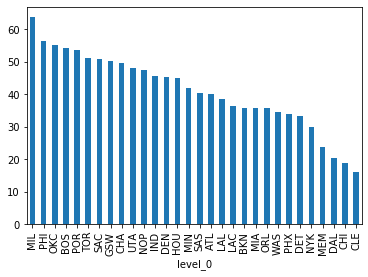

In [11]:
#average number of wins from our sim in graph form
sim_results['avg_number_wins'].sort_values(ascending=False).plot(kind='bar')

In [12]:
sim_avg_wins = sim_results.reset_index()[['level_0','avg_number_wins']]

In [13]:
sim_vs_actual = sim_avg_wins.merge(real_wins,left_on='level_0',right_on='TEAM_ABBREVIATION')

In [14]:
sim_vs_actual.set_index('level_0',inplace=True)

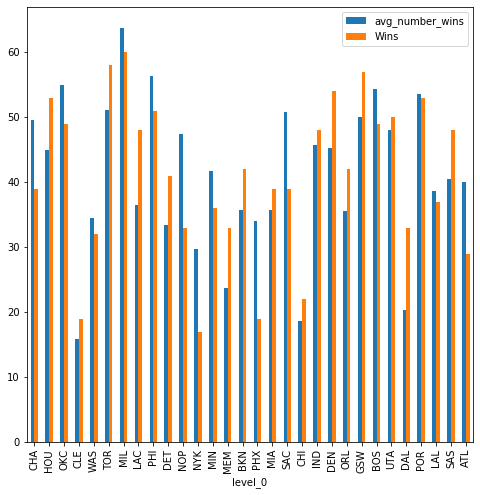

In [15]:
#average sim wins for team vs their actual
sim_vs_actual.plot(kind='bar', figsize=(8, 8))

In [16]:
sim_vs_actual['diff']=sim_vs_actual['avg_number_wins']-sim_vs_actual['Wins']

In [17]:
sim_vs_actual.sort_values(by='diff')

,avg_number_wins,Wins,diff
level_0,,,
DAL,20.383838,33,-12.616162
LAC,36.414141,48,-11.585859
MEM,23.626263,33,-9.373737
DEN,45.323232,54,-8.676768
HOU,44.909091,53,-8.090909
DET,33.323232,41,-7.676768
SAS,40.474747,48,-7.525253
TOR,51.040404,58,-6.959596
GSW,50.080808,57,-6.919192


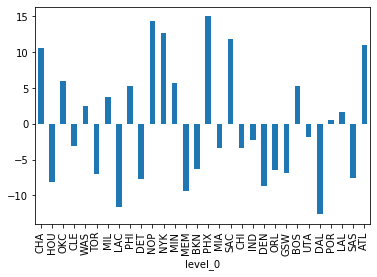

In [18]:
sim_vs_actual['diff'].plot(kind='bar')

In [19]:
sim_vs_actual['abs_diff']=sim_vs_actual['diff'].abs()

In [20]:
sim_vs_actual.mean()

avg_number_wins    4.100000e+01
Wins               4.100000e+01
diff               4.736952e-16
abs_diff           7.074074e+00
dtype: float64

# Playoffs

In [21]:
east = ['MIL','TOR','PHI','BOS','IND','BKN','ORL','DET','CHA','MIA','WAS','ATL','CHI','CLE','NYK']
west = ['GSW','DEN','POR','HOU','UTA','OKC','SAS','LAC','SAC','LAL','MIN','MEM','NOP','DAL','PHO']

In [22]:
def conference(x):
    if x in east:
        return 'E'
    else:
        return 'W'

sim_vs_actual['conference']=sim_vs_actual.index.map(conference)

In [23]:
eastern_teams = sim_vs_actual[sim_vs_actual['conference']=='E']
western_teams = sim_vs_actual[sim_vs_actual['conference']=='W']

In [24]:
east_act_playoff = eastern_teams.sort_values(by='Wins',ascending=False)[:8]
east_sim_playoff = eastern_teams.sort_values(by='avg_number_wins',ascending=False)[:8]

In [25]:
west_act_playoff = western_teams.sort_values(by='Wins',ascending=False)[:8]
west_sim_playoff = western_teams.sort_values(by='avg_number_wins',ascending=False)[:8]

In [26]:
print('actual',east_act_playoff.index)
print('sim',east_sim_playoff.index)
print('actual',west_act_playoff.index)
print('sim',west_sim_playoff.index)

actual Index(['MIL', 'TOR', 'PHI', 'BOS', 'IND', 'BKN', 'ORL', 'DET'], dtype='object', name='level_0')
sim Index(['MIL', 'PHI', 'BOS', 'TOR', 'CHA', 'IND', 'ATL', 'BKN'], dtype='object', name='level_0')
actual Index(['GSW', 'DEN', 'HOU', 'POR', 'UTA', 'OKC', 'LAC', 'SAS'], dtype='object', name='level_0')
sim Index(['OKC', 'POR', 'SAC', 'GSW', 'UTA', 'NOP', 'DEN', 'HOU'], dtype='object', name='level_0')


# Probability

In [27]:
sim_results['std']=sim_results.iloc[:, 0:100].std(axis=1)

In [28]:
sim_results_just_wins=sim_results.iloc[:, 0:100]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001394246CF60>]],
      dtype=object)

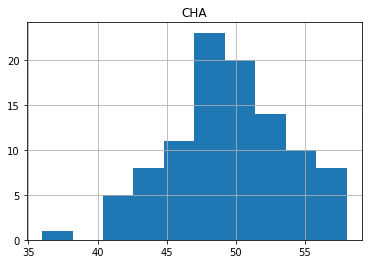

In [29]:
sim_results_just_wins[sim_results_just_wins.index == 'CHA'].transpose().hist()

In [30]:
import scipy.stats
def get_probs(x,y,z):
    return scipy.stats.norm(x, y).cdf(z)

In [31]:
get_probs(0,1,0.5)

0.6914624612740131

In [32]:
probs_df = sim_results.merge(real_wins,left_on=sim_results.index,right_on='TEAM_ABBREVIATION')

In [33]:
probs_df['probability']= probs_df.apply(lambda x: get_probs(x['avg_number_wins'],x['std'],x['Wins']), axis=1)

In [34]:
probs_df.set_index('TEAM_ABBREVIATION',inplace=True)

In [35]:
#under achievers
probs_df[['avg_number_wins','std','Wins','probability']].sort_values(by='probability')[:5]

,avg_number_wins,std,Wins,probability
TEAM_ABBREVIATION,,,,
PHX,33.989899,4.230672,19,0.000198
NOP,47.333333,4.769601,33,0.001327
NYK,29.737374,4.414439,17,0.001955
SAC,50.808081,4.131317,39,0.002130
ATL,40.010101,4.161524,29,0.004076


In [36]:
#over achievers
probs_df[['avg_number_wins','std','Wins','probability']].sort_values(by='probability',ascending=False)[:5]

,avg_number_wins,std,Wins,probability
TEAM_ABBREVIATION,,,,
DAL,20.383838,3.843123,33,0.999486
LAC,36.414141,4.210269,48,0.997037
MEM,23.626263,3.658821,33,0.994796
DEN,45.323232,4.081295,54,0.983248
DET,33.323232,4.085154,41,0.969891


# Teams With All NBA Players

In [37]:
import matplotlib.pyplot as plt
#https://www.nba.com/2018-19-all-nba-teams-official-release
#above links to what players won the award that year

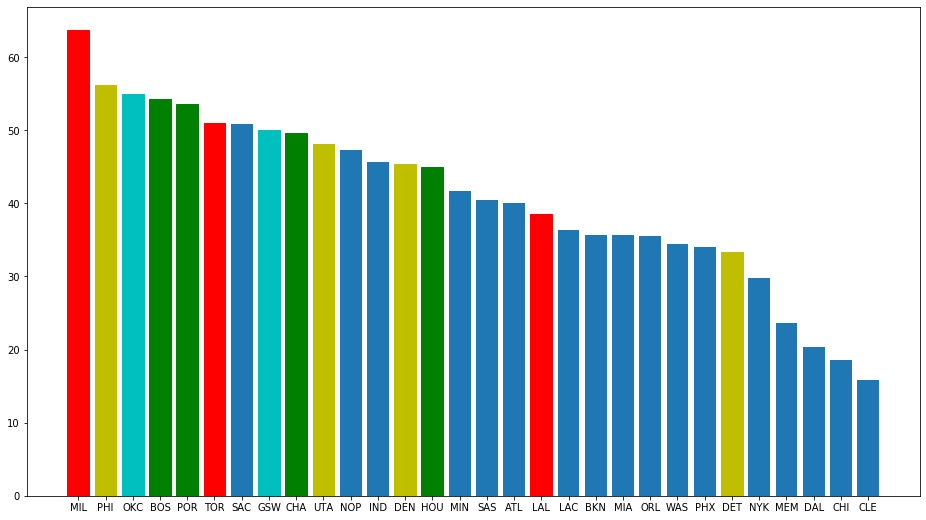

In [39]:
#red-wings, green-guards, yellow-frontcourt, cyan-w and g
bargraph = plt.bar(sim_results['avg_number_wins'].sort_values(ascending=False).index,sim_results['avg_number_wins'].sort_values(ascending=False))
bargraph
plt.rcParams["figure.figsize"] = [16,9]
bargraph[0].set_color('r')
bargraph[1].set_color('y')
bargraph[2].set_color('c')
bargraph[3].set_color('g')
bargraph[4].set_color('g')
bargraph[5].set_color('r')
bargraph[7].set_color('c')
bargraph[8].set_color('g')
bargraph[9].set_color('y')
bargraph[12].set_color('y')
bargraph[13].set_color('g')
bargraph[17].set_color('r')
bargraph[24].set_color('y')
plt.show()

# Who should have been MVP

In [9]:
giannas_df = pd.read_csv("giannas_df.csv")
harden_df = pd.read_csv("harden_df.csv")
george_df = pd.read_csv("george_df.csv")
jokic_df = pd.read_csv("jokic_df.csv")
curry_df = pd.read_csv("curry_df.csv")
lillard_df = pd.read_csv("lillard_df.csv")
embiid_df = pd.read_csv("embiid_df.csv")
kawhi_df = pd.read_csv("kawhi_df.csv")
gobert_df = pd.read_csv("gobert_df.csv")
lebron_df = pd.read_csv("lebron_df.csv")

In [65]:
#find average wins of team without supestar and substract from original teams win average in the original sim
giannas_df['avg_number_wins'] = giannas_df.iloc[:,2:31].mean(axis=1)
giannas_df[giannas_df['level_0']=='MIL']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='MIL']['avg_number_wins'])-giannas_df[giannas_df['level_0']=='MIL']['avg_number_wins'])

Difference: 6    17.7
Name: avg_number_wins, dtype: float64


In [66]:
harden_df['avg_number_wins'] = harden_df.iloc[:,2:31].mean(axis=1)
harden_df[harden_df['level_0']=='HOU']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='HOU']['avg_number_wins'])-harden_df[harden_df['level_0']=='HOU']['avg_number_wins'])

Difference: 1    21.3
Name: avg_number_wins, dtype: float64


In [67]:
george_df['avg_number_wins'] = george_df.iloc[:,2:31].mean(axis=1)
george_df[george_df['level_0']=='OKC']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='OKC']['avg_number_wins'])-george_df[george_df['level_0']=='OKC']['avg_number_wins'])

Difference: 2    22.7
Name: avg_number_wins, dtype: float64


In [68]:
jokic_df['avg_number_wins'] = jokic_df.iloc[:,2:31].mean(axis=1)
jokic_df[jokic_df['level_0']=='DEN']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='DEN']['avg_number_wins'])-jokic_df[jokic_df['level_0']=='DEN']['avg_number_wins'])

Difference: 20    20.0
Name: avg_number_wins, dtype: float64


In [69]:
curry_df['avg_number_wins'] = curry_df.iloc[:,2:31].mean(axis=1)
curry_df[giannas_df['level_0']=='GSW']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='GSW']['avg_number_wins'])-curry_df[curry_df['level_0']=='GSW']['avg_number_wins'])

Difference: 22    16.8
Name: avg_number_wins, dtype: float64


In [71]:
lillard_df['avg_number_wins'] = lillard_df.iloc[:,2:31].mean(axis=1)
lillard_df[giannas_df['level_0']=='POR']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='POR']['avg_number_wins'])-lillard_df[lillard_df['level_0']=='POR']['avg_number_wins'])

Difference: 26    19.5
Name: avg_number_wins, dtype: float64


In [72]:
embiid_df['avg_number_wins'] = embiid_df.iloc[:,2:31].mean(axis=1)
embiid_df[giannas_df['level_0']=='PHI']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='PHI']['avg_number_wins'])-embiid_df[embiid_df['level_0']=='PHI']['avg_number_wins'])

Difference: 8    13.7
Name: avg_number_wins, dtype: float64


In [73]:
kawhi_df['avg_number_wins'] = kawhi_df.iloc[:,2:31].mean(axis=1)
kawhi_df[giannas_df['level_0']=='TOR']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='TOR']['avg_number_wins'])-kawhi_df[kawhi_df['level_0']=='TOR']['avg_number_wins'])

Difference: 5    15.9
Name: avg_number_wins, dtype: float64


In [74]:
gobert_df['avg_number_wins'] = gobert_df.iloc[:,2:31].mean(axis=1)
gobert_df[giannas_df['level_0']=='UTA']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='UTA']['avg_number_wins'])-gobert_df[gobert_df['level_0']=='UTA']['avg_number_wins'])

Difference: 24    20.9
Name: avg_number_wins, dtype: float64


In [75]:
lebron_df['avg_number_wins'] = lebron_df.iloc[:,2:31].mean(axis=1)
lebron_df[lebron_df['level_0']=='LAL']['avg_number_wins']
print('Difference:',int(sim_results[sim_results.index=='LAL']['avg_number_wins'])-lebron_df[lebron_df['level_0']=='LAL']['avg_number_wins'])

Difference: 27    13.9
Name: avg_number_wins, dtype: float64


Paul George should have won MVP